In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLLibrary import LinearRegression, Utilities, StandardizationScale, Metrics


In [2]:
x_data, y_data = Utilities.load_data('data/Lineardata_train.csv',start_x = 1,start_y = 0,end_y = 1)
x_train,y_train, x_cv,y_cv = Utilities.split_data(70, x_data, y_data)
print(f'Train data: {x_train.shape} {y_train.shape}')
print(f'CV data: {x_cv.shape} {y_cv.shape}')

Train data: (35000, 20) (35000, 1)
CV data: (15000, 20) (15000, 1)


In [3]:
scaler = StandardizationScale()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
print(f'Train data: {x_train_scaled.shape}')
print(f'CV data: {x_cv_scaled.shape}')

Train data: (35000, 20)
CV data: (15000, 20)


Epoch   1 ⫸ Cost 21436.450⫷
Epoch   2 ⫸ Cost   0.003  ⫷
Epoch   3 ⫸ Cost   0.003  ⫷
Epoch   4 ⫸ Cost   0.003  ⫷
Epoch   5 ⫸ Cost   0.003  ⫷
Epoch   6 ⫸ Cost   0.003  ⫷
Epoch   7 ⫸ Cost   0.003  ⫷
Epoch   8 ⫸ Cost   0.003  ⫷
Epoch   9 ⫸ Cost   0.003  ⫷
Epoch  10 ⫸ Cost   0.003  ⫷


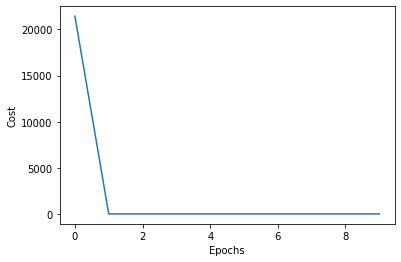

In [4]:
alpha = 0.5
lambda_ = 0
epochs = 10
model = LinearRegression()
_,_,cost_history = model.fit(x_train_scaled, y_train,alpha, epochs, lambda_,plot_cost=True)


In [5]:
yhat_train = model.predict(x_train_scaled)
r2_train = Metrics.r2_score(yhat_train, y_train)
print(f'Train r2: {r2_train}')

yhat_cv = model.predict(x_cv_scaled)
r2_cv = Metrics.r2_score(yhat_cv, y_cv)
print(f'CV r2: {r2_cv}')

Train r2: 0.9999999998776846
CV r2: 0.9999999998767872


Using different values of Regularization parameter to evaluate performance.

In [9]:
alpha = 0.5
lambda_ = 0
lambdas = [0,0.01,0.5,1,4,10,15]
models = []
j_train = []
j_cv = []
r2_train = []
r2_cv = []
epochs = 40
for i,lambda_ in enumerate(lambdas):
  print(f'Lambda = {lambda_}')
  models.append(LinearRegression())
  models[i].fit(x_train_scaled, y_train,alpha, epochs, lambda_)

  yhat_train = models[i].predict(x_train_scaled)
  r2_train.append(Metrics.r2_score(yhat_train,y_train))
  j_train.append(Metrics.mean_square_error(yhat_train, y_train))

  yhat_cv = models[i].predict(x_cv_scaled)
  r2_cv.append(Metrics.r2_score(yhat_cv,y_cv))
  j_cv.append(Metrics.mean_square_error(yhat_cv, y_cv))


Lambda = 0
Epoch   4 ⫸ Cost   0.003  ⫷
Epoch   8 ⫸ Cost   0.003  ⫷
Epoch  12 ⫸ Cost   0.003  ⫷
Epoch  16 ⫸ Cost   0.003  ⫷
Epoch  20 ⫸ Cost   0.003  ⫷
Epoch  24 ⫸ Cost   0.003  ⫷
Epoch  28 ⫸ Cost   0.003  ⫷
Epoch  32 ⫸ Cost   0.003  ⫷
Epoch  36 ⫸ Cost   0.003  ⫷
Epoch  40 ⫸ Cost   0.003  ⫷
Lambda = 0.01
Epoch   4 ⫸ Cost 21841.711⫷
Epoch   8 ⫸ Cost 21841.703⫷
Epoch  12 ⫸ Cost 21841.722⫷
Epoch  16 ⫸ Cost 21841.685⫷
Epoch  20 ⫸ Cost 21841.669⫷
Epoch  24 ⫸ Cost 21841.675⫷
Epoch  28 ⫸ Cost 21841.661⫷
Epoch  32 ⫸ Cost 21841.725⫷
Epoch  36 ⫸ Cost 21841.735⫷
Epoch  40 ⫸ Cost 21841.732⫷
Lambda = 0.5
Epoch   4 ⫸ Cost 1068699.555⫷
Epoch   8 ⫸ Cost 1068802.152⫷
Epoch  12 ⫸ Cost 1068629.946⫷
Epoch  16 ⫸ Cost 1068564.274⫷
Epoch  20 ⫸ Cost 1068691.962⫷
Epoch  24 ⫸ Cost 1068643.880⫷
Epoch  28 ⫸ Cost 1068674.175⫷
Epoch  32 ⫸ Cost 1068807.409⫷
Epoch  36 ⫸ Cost 1068686.628⫷
Epoch  40 ⫸ Cost 1068803.231⫷
Lambda = 1
Epoch   4 ⫸ Cost 2091762.756⫷
Epoch   8 ⫸ Cost 2092019.558⫷
Epoch  12 ⫸ Cost 2091590.427⫷
E

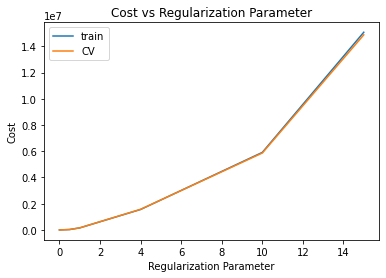

In [10]:
plt.plot(lambdas, j_train, label="train")
plt.plot(lambdas, j_cv, label='CV')
plt.xlabel('Regularization Parameter')
plt.ylabel('Cost')
plt.title("Cost vs Regularization Parameter")
plt.legend()
plt.show()

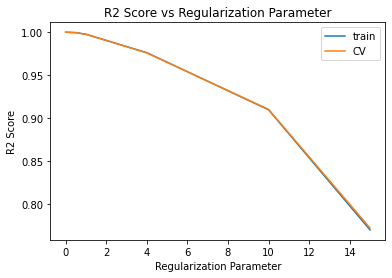

In [11]:
plt.plot(lambdas, r2_train, label="train")
plt.plot(lambdas, r2_cv, label='CV')
plt.xlabel('Regularization Parameter')
plt.ylabel('R2 Score')
plt.title("R2 Score vs Regularization Parameter")
plt.legend()
plt.show()